In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  confusion_matrix
from sklearn.svm import SVC

In [241]:
df = pd.read_csv('movie_success_rate.csv')
df

Rank                    Title                     Genre  \
0       1.0  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2.0               Prometheus  Adventure,Mystery,Sci-Fi   
2       3.0                    Split           Horror,Thriller   
3       4.0                     Sing   Animation,Comedy,Family   
4       5.0            Suicide Squad  Action,Adventure,Fantasy   
..      ...                      ...                       ...   
834   995.0                Project X                    Comedy   
835   997.0          Hostel: Part II                    Horror   
836   998.0   Step Up 2: The Streets       Drama,Music,Romance   
837  1000.0               Nine Lives     Comedy,Family,Fantasy   
838     NaN                      NaN                       NaN   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
834  3 high school seniors throw a birthday party t...       Nima Nourizadeh   
835  Three American college students studying abroa...              Eli Roth   
836  Romantic sparks occur between two dance studen...            Jon M. Chu   
837  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   
838                                                NaN                   NaN   

                                                Actors    Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014.0   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012.0   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016.0   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016.0   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016.0   
..                                                 ...     ...   
834  Thomas Mann, Oliver Cooper, Jonathan Daniel Br...  2012.0   
835  Lauren German, Heather Matarazzo, Bijou Philli...  2007.0   
836  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008.0   
837  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016.0   
838                                                NaN     NaN   

     Runtime (Minutes)   Rating        Votes  ...  Music  Musical  Mystery  \
0                121.0  8.10000  757074.0000  ...    0.0      0.0      0.0   
1                124.0  7.00000  485820.0000  ...    0.0      0.0      1.0   
2                117.0  7.30000  157606.0000  ...    0.0      0.0      0.0   
3                108.0  7.20000   60545.0000  ...    0.0      0.0      0.0   
4                123.0  6.20000  393727.0000  ...    0.0      0.0      0.0   
..                 ...      ...          ...  ...    ...      ...      ...   
834               88.0  6.70000  164088.0000  ...    0.0      0.0      0.0   
835               94.0  5.50000   73152.0000  ...    0.0      0.0      0.0   
836               98.0  6.20000   70699.0000  ...    1.0      0.0      0.0   
837               87.0  5.30000   12435.0000  ...    0.0      0.0      0.0   
838                NaN  6.81432  193230.2518  ...    NaN      NaN      NaN   

     Romance  Sci-Fi  Sport  Thriller  War  Western  Success  
0        0.0     1.0    0.0       0.0  0.0      0.0      1.0  
1        0.0     1.0    0.0       0.0  0.0      0.0      1.0  
2        0.0     0.0    0.0       1.0  0.0      0.0      0.0  
3        0.0     0.0    0.0       0.0  0.0      0.0      0.0  
4        0.0     0.0    0.0       0.0  0.0      0.0      0.0  
..       ...     ...    ...       ...  ...      ...      ...  
834      0.0     0.0    0.0       0.0  0.0      0.0      0.0  
835      0.0     0.

In [242]:
# Data Exploration
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [243]:
# Data Preprocessing
df = df.dropna()
df.isnull().sum()
df = df.drop('Genre', axis=1)
df['Year'] = df['Year'].astype(int)
df

Rank                     Title  \
0       1.0   Guardians of the Galaxy   
1       2.0                Prometheus   
2       3.0                     Split   
3       4.0                      Sing   
4       5.0             Suicide Squad   
..      ...                       ...   
833   994.0  Resident Evil: Afterlife   
834   995.0                 Project X   
835   997.0           Hostel: Part II   
836   998.0    Step Up 2: The Streets   
837  1000.0                Nine Lives   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley Scott   
2    Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3    In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4    A secret government agency recruits some of th...            David Ayer   
..                                                 ...                   ...   
833  While still out to destroy the evil Umbrella C...    Paul W.S. Anderson   
834  3 high school seniors throw a birthday party t...       Nima Nourizadeh   
835  Three American college students studying abroa...              Eli Roth   
836  Romantic sparks occur between two dance studen...            Jon M. Chu   
837  A stuffy businessman finds himself trapped ins...      Barry Sonnenfeld   

                                                Actors  Year  \
0    Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014   
1    Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
2    James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016   
3    Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016   
4    Will Smith, Jared Leto, Margot Robbie, Viola D...  2016   
..                                                 ...   ...   
833  Milla Jovovich, Ali Larter, Wentworth Miller,K...  2010   
834  Thomas Mann, Oliver Cooper, Jonathan Daniel Br...  2012   
835  Lauren German, Heather Matarazzo, Bijou Philli...  2007   
836  Robert Hoffman, Briana Evigan, Cassie Ventura,...  2008   
837  Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...  2016   

     Runtime (Minutes)  Rating     Votes  Revenue (Millions)  ...  Music  \
0                121.0     8.1  757074.0              333.13  ...    0.0   
1                124.0     7.0  485820.0              126.46  ...    0.0   
2                117.0     7.3  157606.0              138.12  ...    0.0   
3                108.0     7.2   60545.0              270.32  ...    0.0   
4                123.0     6.2  393727.0              325.02  ...    0.0   
..                 ...     ...       ...                 ...  ...    ...   
833               97.0     5.9  140900.0               60.13  ...    0.0   
834               88.0     6.7  164088.0               54.72  ...    0.0   
835               94.0     5.5   73152.0               17.54  ...    0.0   
836               98.0     6.2   70699.0               58.01  ...    1.0   
837               87.0     5.3   12435.0               19.64  ...    0.0   

     Musical  Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  Success  
0        0.0      0.0      0.0     1.0    0.0       0.0  0.0      0.0      1.0  
1        0.0      1.0      0.0     1.0    0.0       0.0  0.0      0.0      1.0  
2        0.0      0.0      0.0     0.0    0.0       1.0  0.0      0.0      0.0  
3        0.0      0.0      0.0     0.0    0.0       0.0  0.0      0.0      0.0  
4        0.0      0.0      0.0     0.0    0.0       0.0  0.0      0.0      0.0  
..       ...      ...      ...     ...    ...       ...  ...      ...      ...  
833      0.0      0.0      0.0     0.0    0.0       0.0  0.0      0.0      0.0  
834      0.0      0.0      0.0     0.0    0.0       0.0  0.0      0.0      0.0  
835      0.0      0.0      0.0     0.0    0.0       0.0  0.0      0.0      0.0  
836      0.0      0.0      1.0     0.0    0.0       0.0  0.0 

C:\Users\fiifi\AppData\Local\Temp\ipykernel_15916\3916519904.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.2f')


<Axes: >

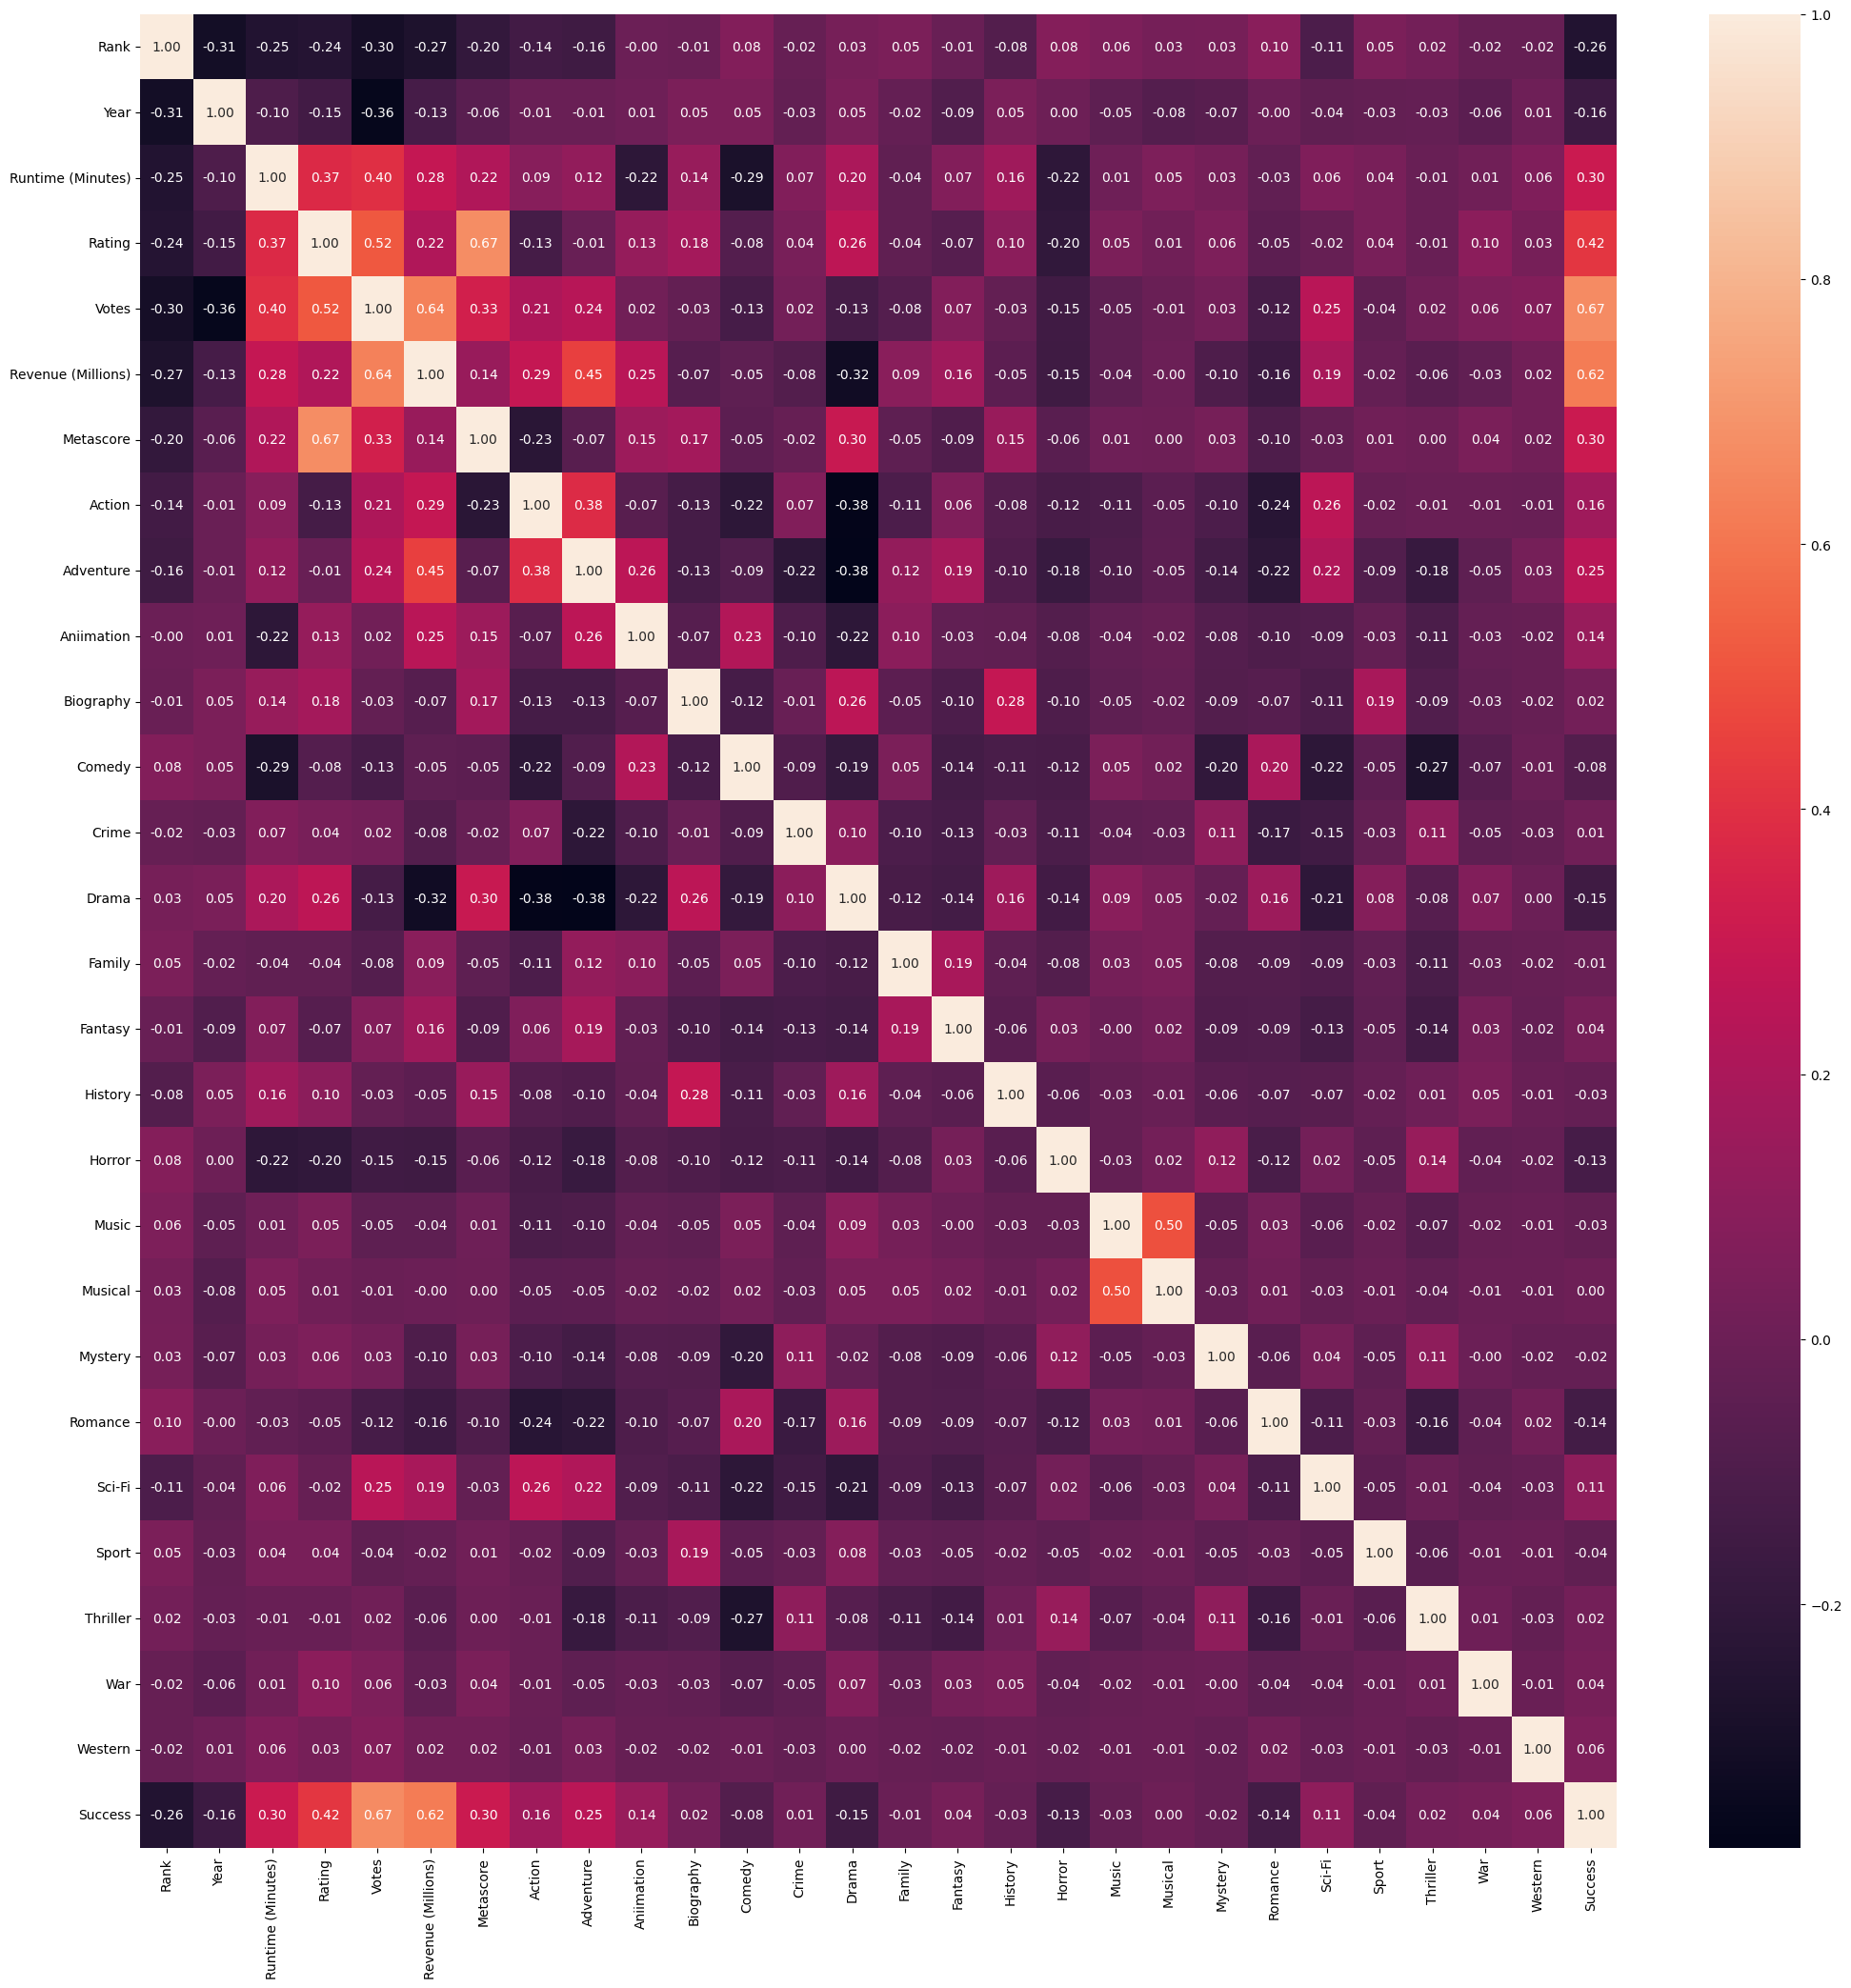

In [244]:
#Correlation values between the numerical columns
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, fmt='.2f')

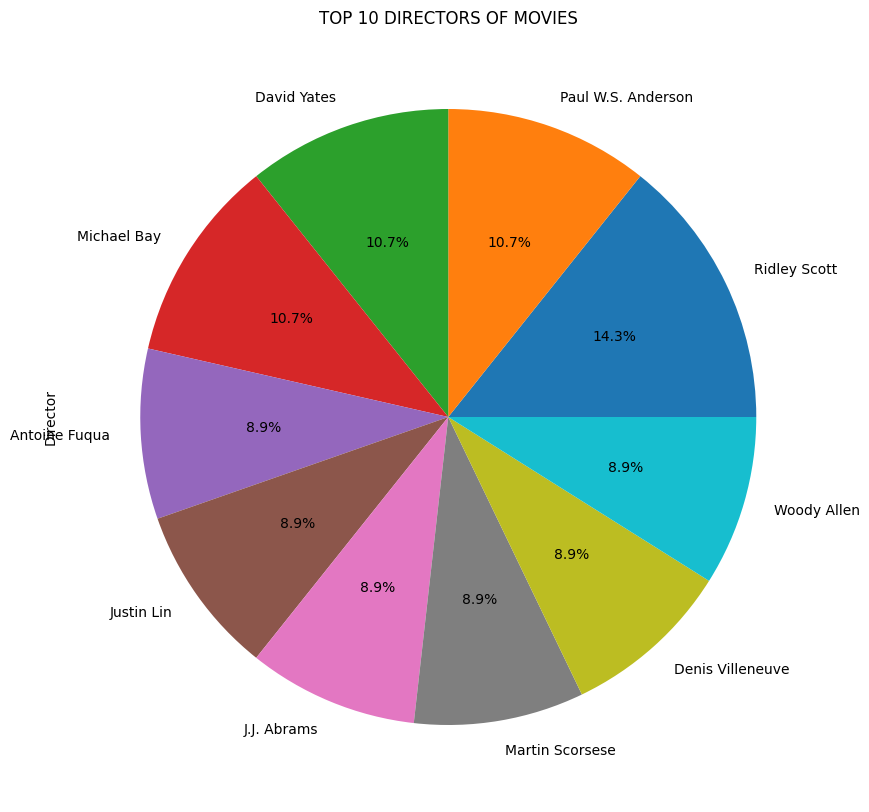

In [245]:
#DIRECTOR ANALYSIS :
df.Director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 DIRECTORS OF MOVIES')
plt.show()

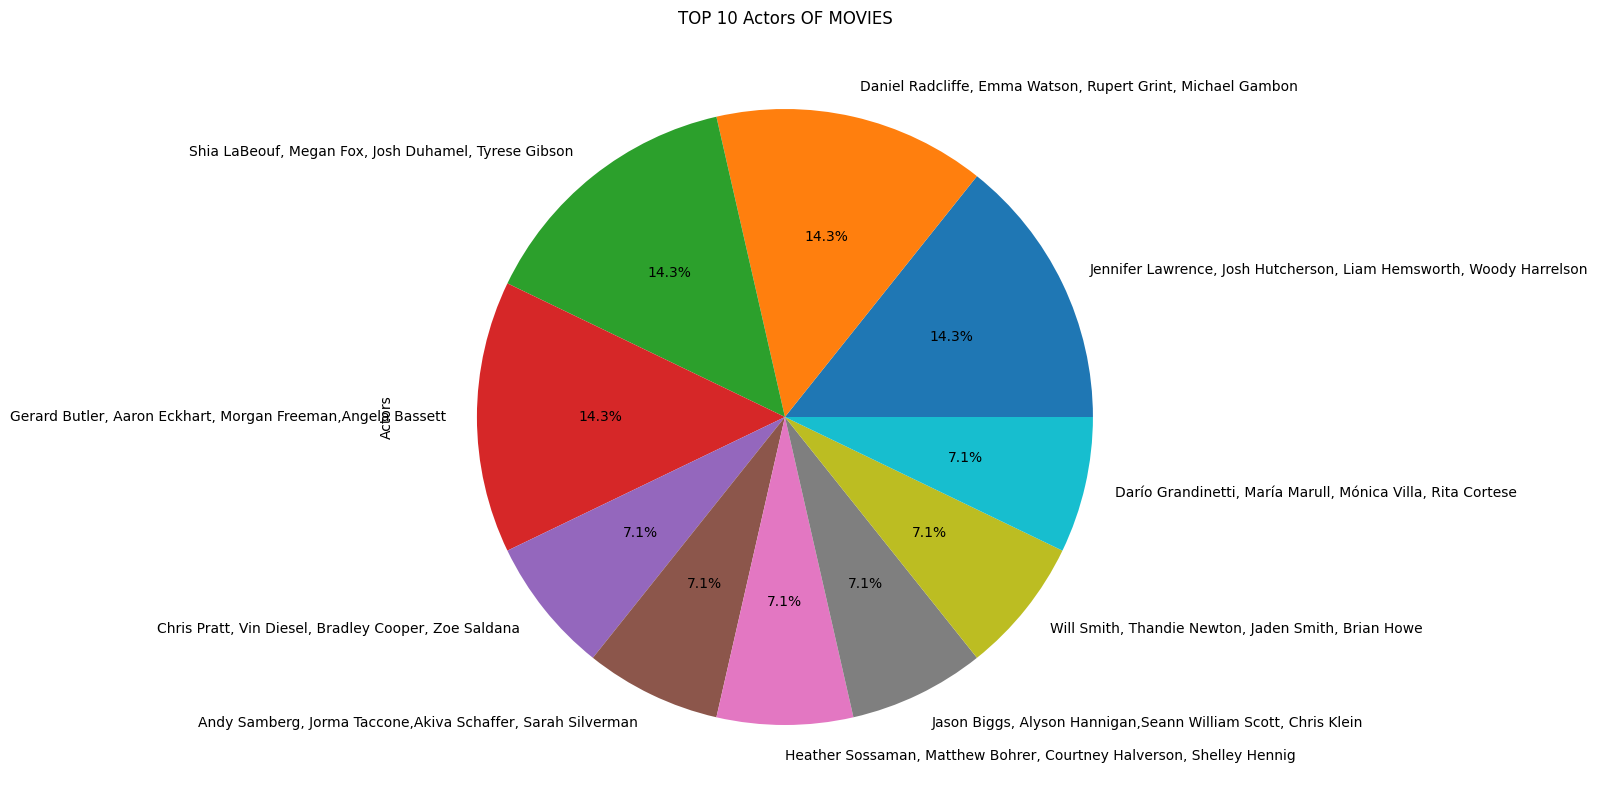

In [246]:
#ACTOR ANALYSIS :
df['Actors'].value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 Actors OF MOVIES')
plt.show()

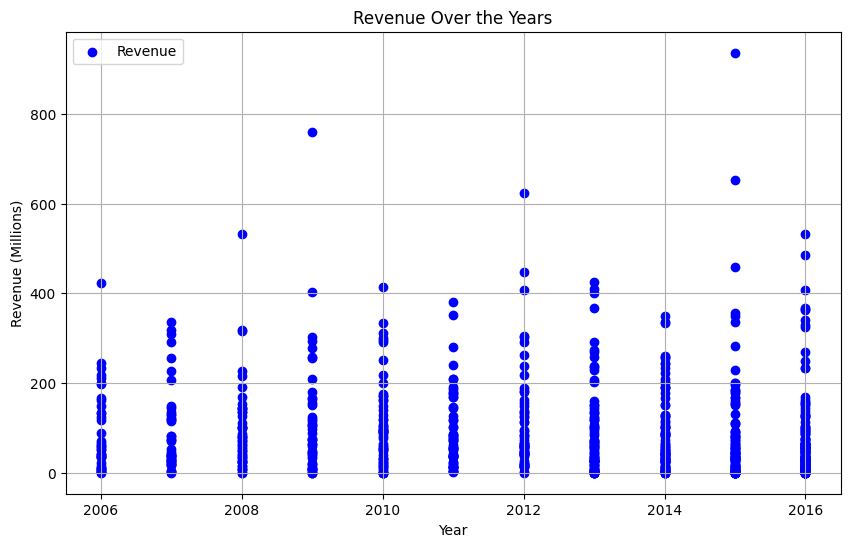

In [247]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Year'], df['Revenue (Millions)'], color='b', label='Revenue', marker='o')

#labels,title and legend
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue Over the Years')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

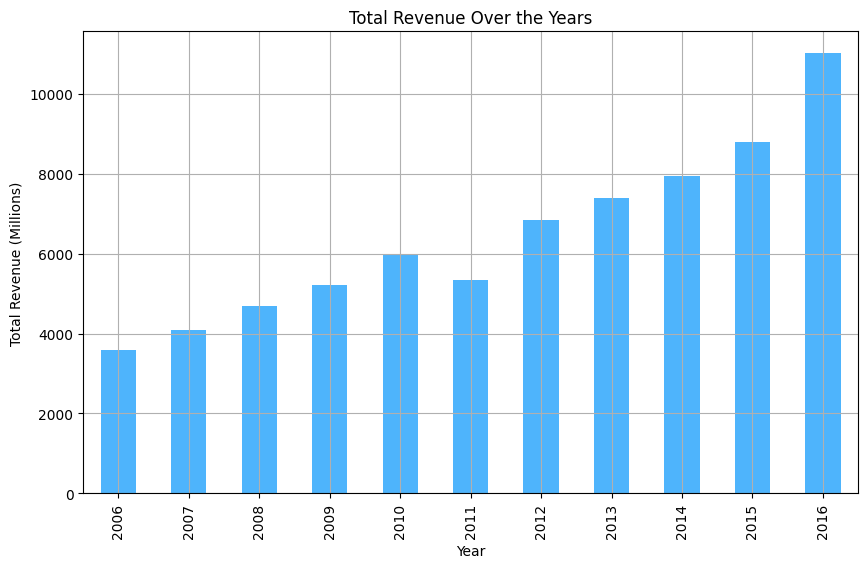

In [248]:
# Group data by 'Year' and calculate total revenue for each year
revenue_by_year = df.groupby('Year')['Revenue (Millions)'].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
revenue_by_year.plot(kind='bar', color='#0394fc', alpha=0.7)

#labels and title
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.title('Total Revenue Over the Years')
plt.grid(True)

# Show the plot
plt.show()

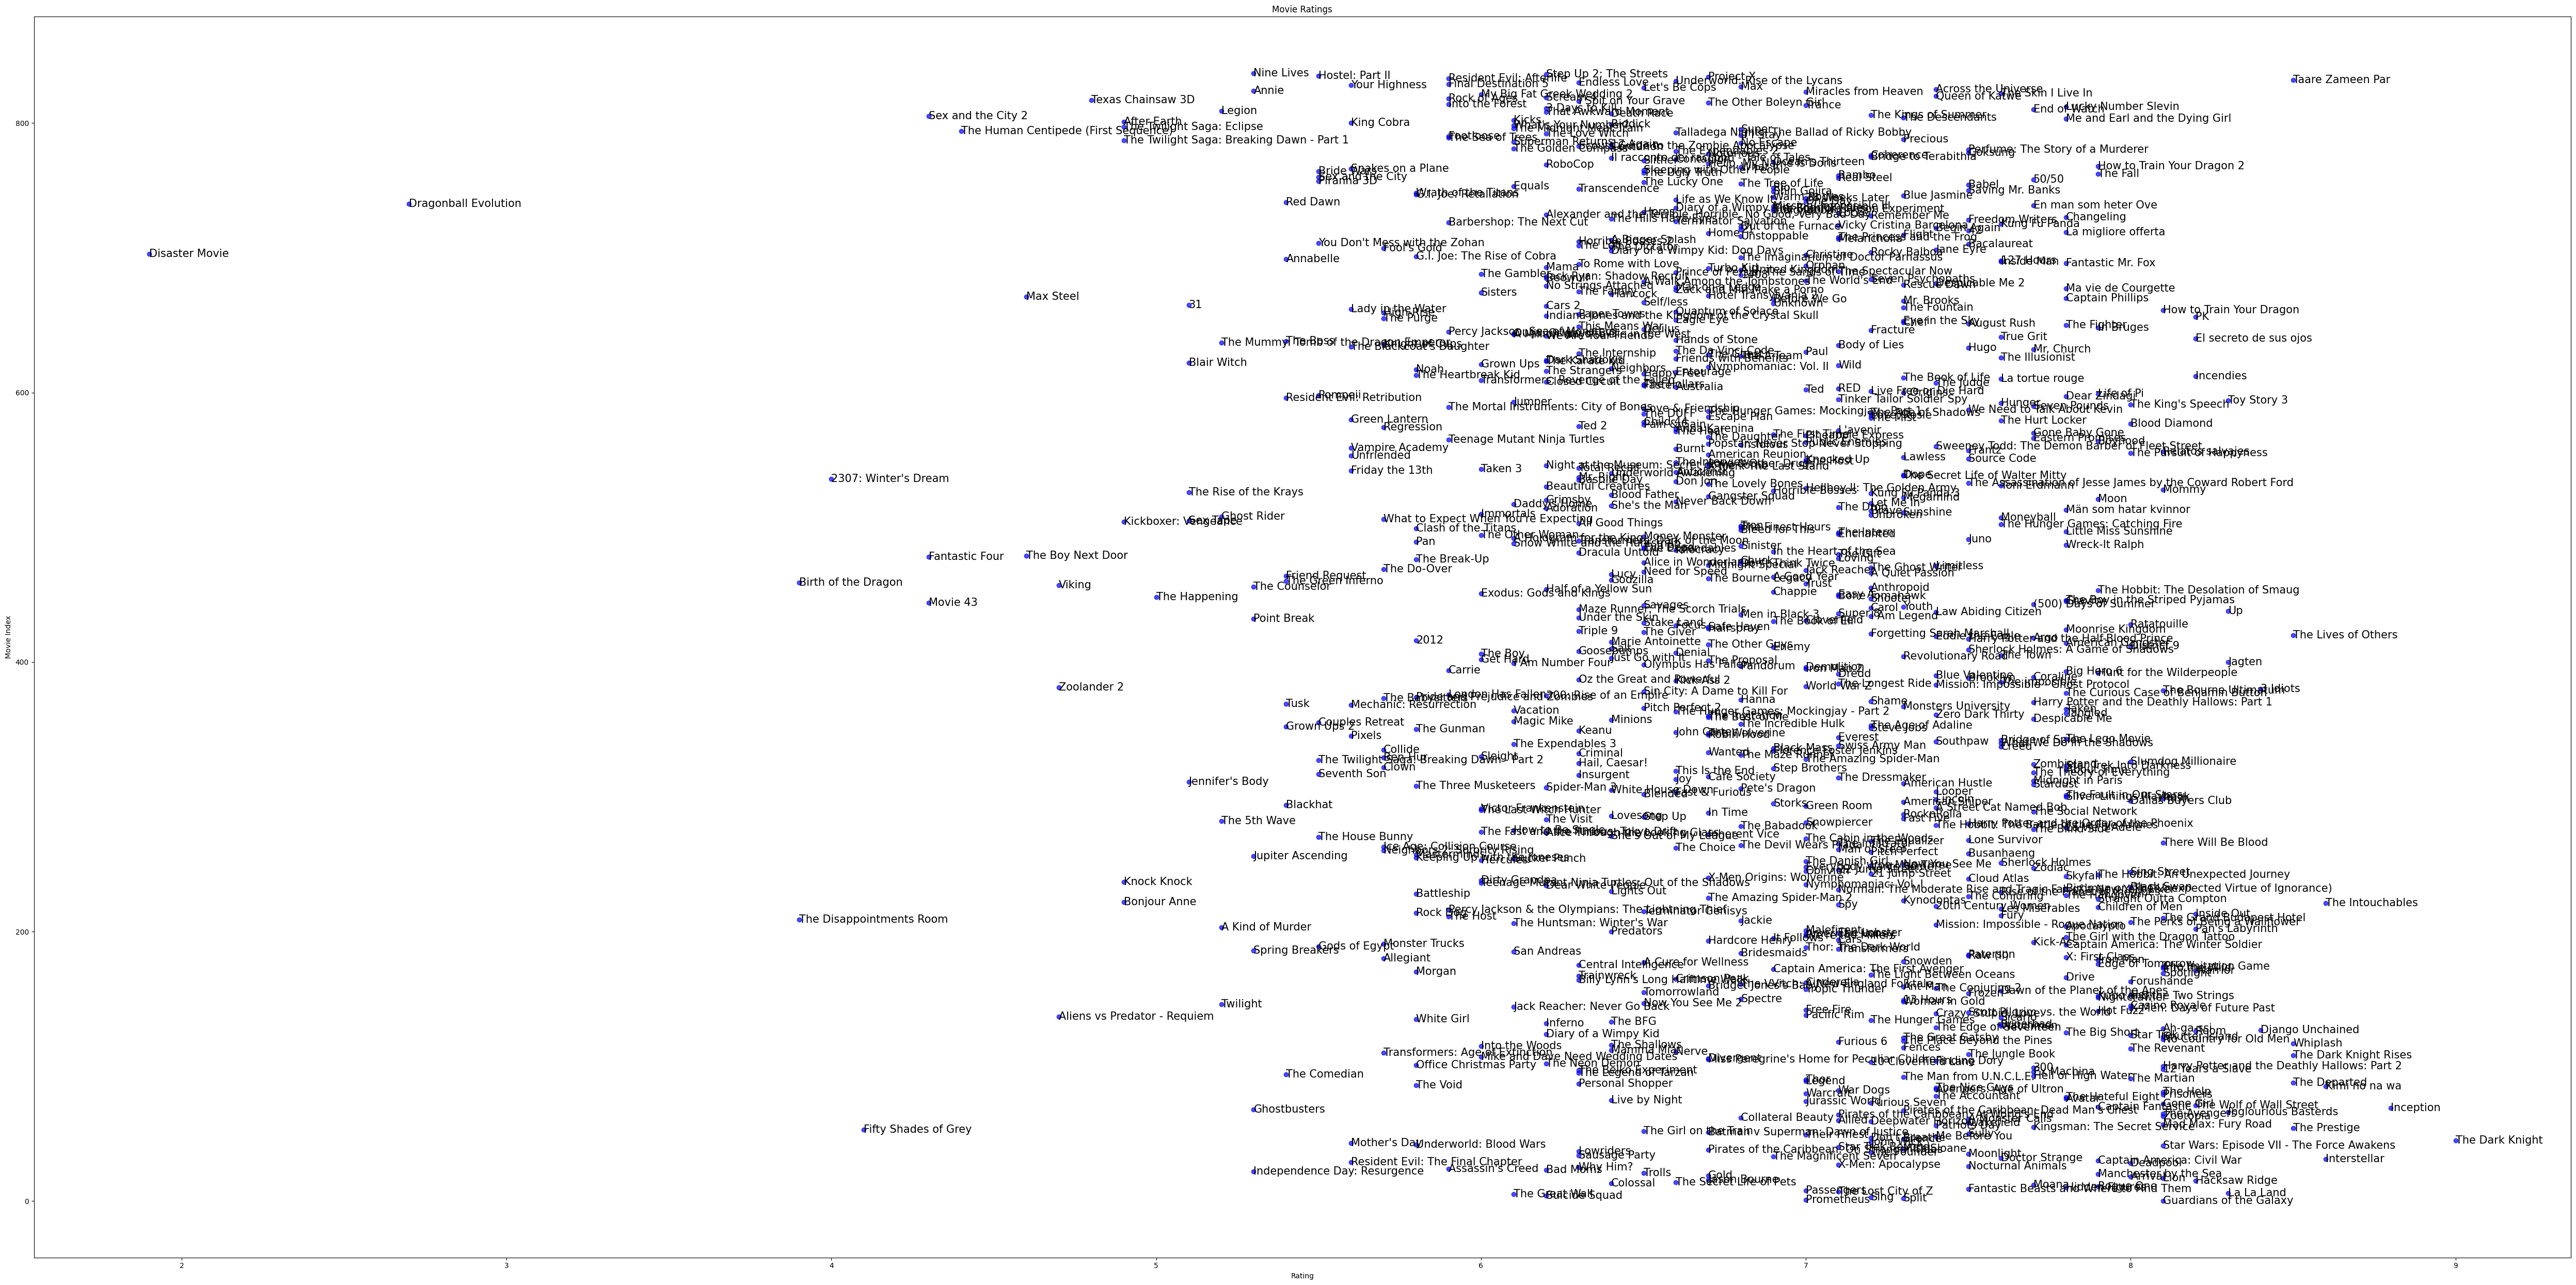

In [249]:
# Create the scatter plot
plt.figure(figsize=(50, 25))  # Adjust the figure size if needed
plt.scatter(df['Rating'], df.index, color='b', alpha=0.7)

# movie titles as text labels
for i, title in enumerate(df['Title']):
    plt.text(df['Rating'][i], i, title, fontsize=15, va='center')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Movie Index')
plt.title('Movie Ratings')

# Show the plot
plt.tight_layout()  # Ensures the labels don't overlap
plt.show()

In [250]:
# Metascore Analysis
def Analysis(score):
    if 0 <= score < 40:
        text = "Generally unfavorable reviews"
    elif 40 <= score < 60:
        text = 'Mixed or average reviews'
    elif 60 <= score < 80:
        text = 'Generally favorable reviews'
    else:
        text = 'Universal acclaim'
    return text

df['Metascore Analysis'] = df['Metascore'].astype(int).apply(Analysis)

print(df[['Metascore', 'Metascore Analysis']])


     Metascore             Metascore Analysis
0         76.0    Generally favorable reviews
1         65.0    Generally favorable reviews
2         62.0    Generally favorable reviews
3         59.0       Mixed or average reviews
4         40.0       Mixed or average reviews
..         ...                            ...
833       37.0  Generally unfavorable reviews
834       48.0       Mixed or average reviews
835       46.0       Mixed or average reviews
836       50.0       Mixed or average reviews
837       11.0  Generally unfavorable reviews

[838 rows x 2 columns]


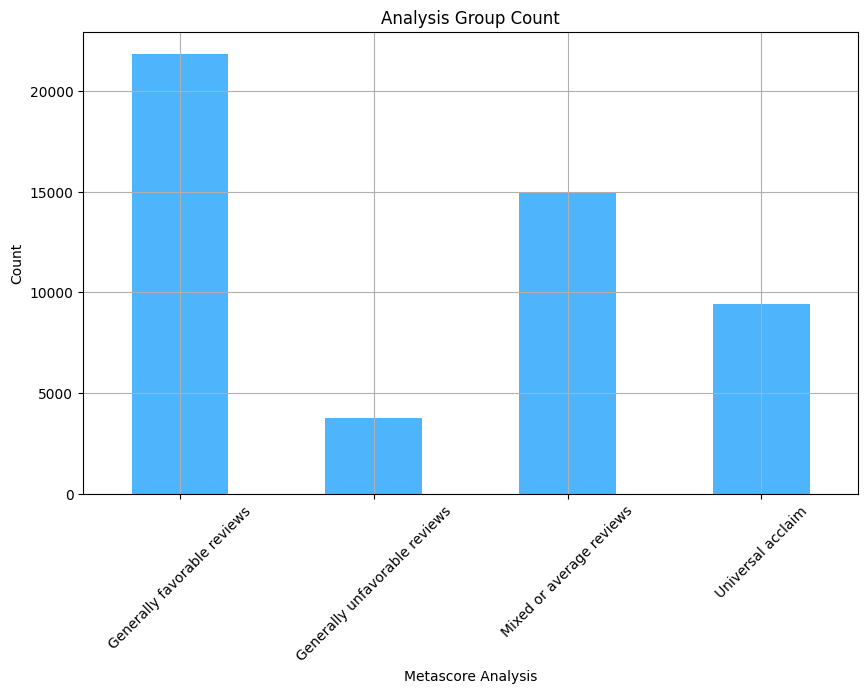

In [251]:
Metascore = df.groupby('Metascore Analysis')['Metascore'].sum()
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
Metascore.plot(kind='bar', color='#0394fc', alpha=0.7)

#labels and title
plt.xlabel('Metascore Analysis')
plt.ylabel('Count')
plt.title('Analysis Group Count')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [252]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Standardize the features using the StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Training Accuracy of Random Forest:  1.0
Testing Accuracy of Random Forest:  0.9940476190476191


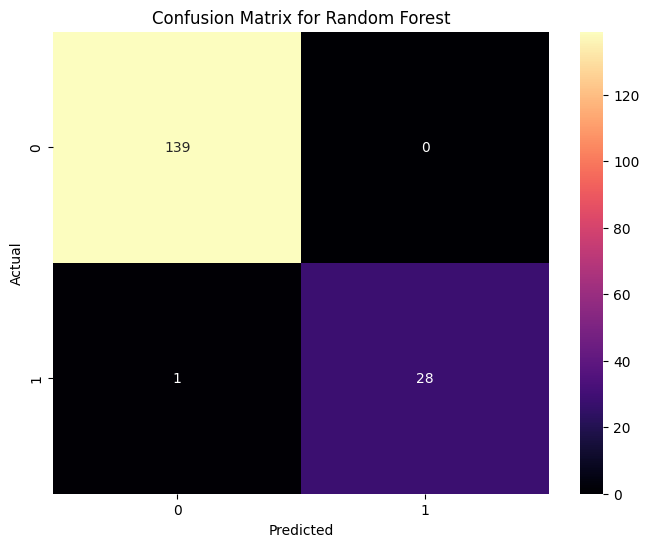

In [253]:
# Create a Random Forest classifier with 60 estimators (trees)
rf = RandomForestClassifier(n_estimators=60)

# Train the Random Forest classifier on the training data
rf.fit(x_train, y_train)

# Make predictions on the testing data using the trained model
y_pred_rf_test = rf.predict(x_test)
y_pred_rf_train = rf.predict(x_train)

# Calculate accuracy scores for training and testing predictions
test_acc_rf = accuracy_score(y_pred_rf_test, y_test)
train_acc_rf = accuracy_score(y_pred_rf_train, y_train)

# Print the training and testing accuracy scores for Random Forest
print("Training Accuracy of Random Forest: ", train_acc_rf)
print("Testing Accuracy of Random Forest: ", test_acc_rf)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), fmt='d', annot=True, cmap='magma')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training Accuracy of SVM:  0.9447761194029851
Testing Accuracy of SVM:  0.9107142857142857


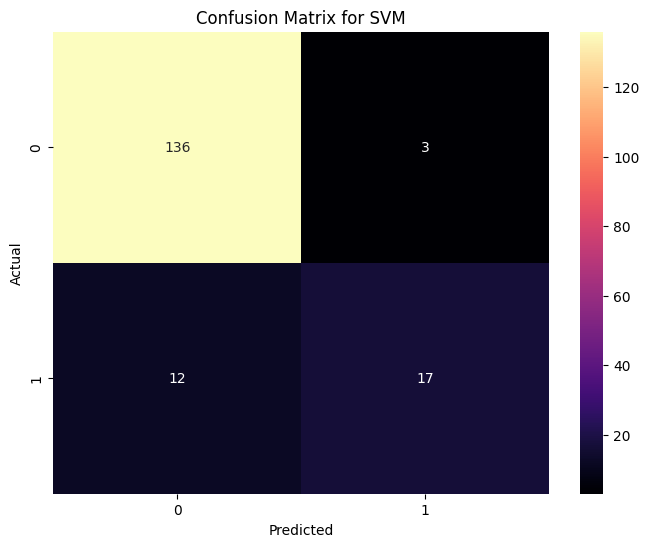

In [254]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm.fit(x_train, y_train)

# Make predictions on the testing and training data using the trained SVM model
y_pred_svm_test = svm.predict(x_test)
y_pred_svm_train = svm.predict(x_train)

# Calculate accuracy scores for both testing and training predictions
test_acc_svm = accuracy_score(y_pred_svm_test, y_test)
train_acc_svm = accuracy_score(y_pred_svm_train, y_train)

# Print the training and testing accuracy scores for SVM
print("Training Accuracy of SVM: ", train_acc_svm)
print("Testing Accuracy of SVM: ", test_acc_svm)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_test), fmt='d', annot=True, cmap='magma')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()